In [32]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
y_train

,diagnosis
453,B
310,B
165,B
291,B
521,M
...,...
20,B
105,M
53,M
405,B


In [38]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [39]:
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

In [40]:
class MySimpleNN():
  def __init__(self,X):
    self.weights = torch.rand(X.shape[1],1,dtype=torch.float64,requires_grad=True)
    self.bias = torch.zeros(1,dtype=torch.float64,requires_grad=True)
  def forward(self,X):
    z = torch.matmul(X,self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred
  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss


In [41]:
learning_rate = 0.01
epochs = 100

In [42]:
model = MySimpleNN(X_test_tensor)
model.weights

tensor([[0.5446],
        [0.1416],
        [0.0515],
        [0.2609],
        [0.5077],
        [0.3611],
        [0.3221],
        [0.0163],
        [0.7332],
        [0.0046],
        [0.1919],
        [0.5295],
        [0.1014],
        [0.1116],
        [0.9551],
        [0.8645],
        [0.6815],
        [0.9702],
        [0.3714],
        [0.7702],
        [0.0143],
        [0.8951],
        [0.7345],
        [0.7624],
        [0.5643],
        [0.3848],
        [0.2106],
        [0.4717],
        [0.5289],
        [0.5126]], dtype=torch.float64, requires_grad=True)

In [43]:
## loop till epochs
## forward pass
## loss calculation
## backwards updating grad

for i in range(epochs):
  ## forward pass
  y_pred = model.forward(X_train_tensor)
  # print(y_pred)

  ## loss cal
  loss = model.loss_function(y_pred, y_train_tensor)
  ## calculate the derivative of loss wrt weights and biases
  print(f"epoch {i+1} loss : {loss}")
  loss.backward()

  ## update weights
  with torch.no_grad():
      model.weights -= learning_rate * model.weights.grad
      model.bias -= learning_rate * model.bias.grad
  ## as the weights and biases accumulate
  model.weights.grad.zero_()
  model.bias.grad.zero_()



epoch 1 loss : 3.3110382613469445
epoch 2 loss : 3.295955297393794
epoch 3 loss : 3.2808902883545907
epoch 4 loss : 3.2658434378602843
epoch 5 loss : 3.2507768920024946
epoch 6 loss : 3.235518151925476
epoch 7 loss : 3.2202784631745573
epoch 8 loss : 3.2050580540953075
epoch 9 loss : 3.1898571583589934
epoch 10 loss : 3.1746760151081768
epoch 11 loss : 3.1595148691015575
epoch 12 loss : 3.144373970838084
epoch 13 loss : 3.1291516506290686
epoch 14 loss : 3.113683971611649
epoch 15 loss : 3.097801836496506
epoch 16 loss : 3.081763065660276
epoch 17 loss : 3.065747765816154
epoch 18 loss : 3.049756260773439
epoch 19 loss : 3.0337888823395742
epoch 20 loss : 3.0178459704986214
epoch 21 loss : 3.0019278736250885
epoch 22 loss : 2.9860349486574878
epoch 23 loss : 2.9701675613239216
epoch 24 loss : 2.954326086324958
epoch 25 loss : 2.9385109075463354
epoch 26 loss : 2.922722418253313
epoch 27 loss : 2.9069610213014547
epoch 28 loss : 2.8912271293304554
epoch 29 loss : 2.875521164977617
epoch

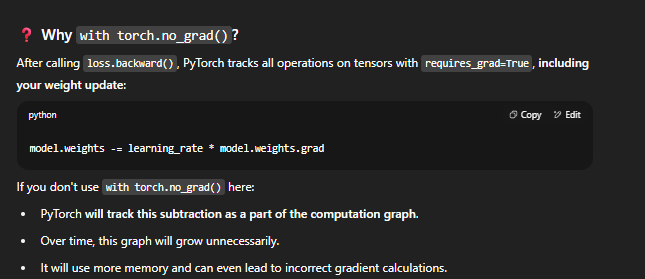

In [44]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.5461680293083191
